## EXPERIMENT 1: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *

from IPython import embed


### MagFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

### Load data

In [2]:
# # Get all features from feature lists from magface model
# feature_list_children = '../../data/raw_full/feat_img_children_full.list'
# feature_list_adults = '../../data/raw_full/feat_img_adults_full.list'

# image_names_c, ids_c, num_ids_c, norm_feats_c = load_magface_vectors(feature_list_children)
# image_names_a, ids_a, num_ids_a, norm_feats_a = load_magface_vectors(feature_list_adults)

# # Similarity matrices from magface - all
# sim_mat_c = np.dot(norm_feats_c, norm_feats_c.T)
# sim_mat_a = np.dot(norm_feats_a, norm_feats_a.T)

# # Dataframes with info, removes names not in magface results
# children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv') #erstat med den opdaterede
# children_all = children_all[children_all.image_name.isin(image_names_c)]
# adults_all = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv') #erstat med den opdaterede
# adults_all = adults_all[adults_all.image_name.isin(image_names_a)] # OBS, this operation because some magface images has not been through all adults images.


In [3]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/feat_img_children_full.list'
feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/feature_vectors_from_adults_bibel_cropped.list'


def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [4]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


/data/raw_full/children_full/Asian_366/Asian_366_5.png
/data/raw_full/children_full/Asian_366/Asian_366_2.png
/data/raw_full/children_full/Asian_366/Asian_366_1.png
/data/raw_full/children_full/Asian_366/Asian_366_4.png
/data/raw_full/children_full/Asian_212/Asian_212_6.png
/data/raw_full/children_full/Asian_212/Asian_212_8.png
/data/raw_full/children_full/Asian_212/Asian_212_5.png
/data/raw_full/children_full/Asian_212/Asian_212_2.png
/data/raw_full/children_full/Asian_212/Asian_212_1.png
/data/raw_full/children_full/Asian_212/Asian_212_10.png
/data/raw_full/children_full/African_322/African_322_24.png
/data/raw_full/children_full/African_322/African_322_85.png
/data/raw_full/children_full/African_322/African_322_88.png
/data/raw_full/children_full/African_322/African_322_54.png
/data/raw_full/children_full/Caucasian_1313/Caucasian_1313_11.png
/data/raw_full/children_full/Caucasian_1313/Caucasian_1313_14.png
/data/raw_full/children_full/Caucasian_1313/Caucasian_1313_5.png
/data/raw_fu

In [5]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


/data/data_full/RFW/data/African/m.048v_w/m.048v_w_0003.jpg
/data/data_full/RFW/data/African/m.048v_w/m.048v_w_0004.jpg
/data/data_full/RFW/data/African/m.048v_w/m.048v_w_0002.jpg
/data/data_full/RFW/data/African/m.02wcpdz/m.02wcpdz_0001.jpg
/data/data_full/RFW/data/African/m.02wcpdz/m.02wcpdz_0002.jpg
/data/data_full/RFW/data/African/m.04jmt1g/m.04jmt1g_0001.jpg
/data/data_full/RFW/data/African/m.04jmt1g/m.04jmt1g_0003.jpg
/data/data_full/RFW/data/African/m.012mmb/m.012mmb_0001.jpg
/data/data_full/RFW/data/African/m.012mmb/m.012mmb_0002.jpg
/data/data_full/RFW/data/African/m.0ddhn9_/m.0ddhn9__0003.jpg
/data/data_full/RFW/data/African/m.04l4q6/m.04l4q6_0003.jpg
/data/data_full/RFW/data/African/m.04l4q6/m.04l4q6_0001.jpg
/data/data_full/RFW/data/African/m.04l4q6/m.04l4q6_0002.jpg
/data/data_full/RFW/data/African/m.02prfwx/m.02prfwx_0003.jpg
/data/data_full/RFW/data/African/m.04sm69/m.04sm69_0002.jpg
/data/data_full/RFW/data/African/m.02686yy/m.02686yy_0001.jpg
/data/data_full/RFW/data/A

In [6]:
len(image_names_a)

10561

In [7]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv') #erstat med den opdaterede
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv') #erstat med den opdaterede
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

In [8]:
# feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/feature_vectors_from_adults_bibel.list'

# def load_and_compute_similarity_chunk(feature_list, dtype=np.float32, chunk_size=1000, output_file='similarity_matrix.dat'):
#     # Load all data
#     image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

#     total_entries = len(image_names)
#     all_image_names = []
#     all_ids = []

#     # Initialize a memory-mapped file for the final similarity matrix
#     sim_mat_full = np.memmap(output_file, dtype=dtype, mode='w+', shape=(total_entries, total_entries))

#     for start_idx in range(0, total_entries, chunk_size):
#         end_idx = min(start_idx + chunk_size, total_entries)

#         chunk_image_names = image_names[start_idx:end_idx]
#         chunk_ids = ids[start_idx:end_idx]
#         chunk_norm_feats = norm_feats[start_idx:end_idx]

#         # Convert dtype to reduce memory usage
#         chunk_norm_feats = chunk_norm_feats.astype(dtype)

#         # Compute intra-chunk similarity matrix
#         chunk_sim_mat = np.dot(chunk_norm_feats, chunk_norm_feats.T)

#         # Place the intra-chunk similarity matrix into the full similarity matrix
#         sim_mat_full[start_idx:end_idx, start_idx:end_idx] = chunk_sim_mat

#         all_image_names.extend(chunk_image_names)
#         all_ids.extend(chunk_ids)

#         # Compute inter-chunk similarity matrices with previous chunks
#         for prev_start_idx in range(0, start_idx, chunk_size):
#             prev_end_idx = min(prev_start_idx + chunk_size, total_entries)
#             prev_chunk_norm_feats = norm_feats[prev_start_idx:prev_end_idx]
#             prev_chunk_norm_feats = prev_chunk_norm_feats.astype(dtype)

#             inter_chunk_sim_mat = np.dot(prev_chunk_norm_feats, chunk_norm_feats.T)

#             # Assign the inter-chunk similarity matrix correctly handling different shapes
#             sim_mat_full[prev_start_idx:prev_end_idx, start_idx:end_idx] = inter_chunk_sim_mat
#             sim_mat_full[start_idx:end_idx, prev_start_idx:prev_end_idx] = inter_chunk_sim_mat.T

#     all_image_names = np.array(all_image_names)
#     all_ids = np.array(all_ids)

#     # Flush the memory-mapped file to ensure all data is written to disk
#     sim_mat_full.flush()

#     return all_image_names, all_ids, num_ids, sim_mat_full


In [9]:

# # Usage example
# output_file = 'similarity_matrix.dat'
# image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity_chunk(feature_list_adults, output_file=output_file)

# # Save the results to files
# np.save('image_names.npy', image_names_a)
# np.save('ids.npy', ids_a)
# np.save('num_ids.npy', num_ids_a)
# sim_mat_a.flush()  # Ensure the memory-mapped file is fully written to disk

# # Load the similarity matrix from the memory-mapped file for verification
# sim_mat_a = np.memmap(output_file, dtype=np.float32, mode='r', shape=(len(image_names_a), len(image_names_a)))
# # Verify shapes
# print(f"Image Names: {len(image_names_a)}")
# print(f"IDs: {len(ids_a)}")
# print(f"Num IDs: {num_ids_a}")
# print(f"Similarity Matrix Shape: {sim_mat_a.shape}")

# # Cleanup: Remove the memory-mapped file if it's no longer needed
# os.remove(output_file)


### Make memmap into a numpy array

In [10]:

# # Load the saved arrays
# image_names_a = np.load('image_names.npy')
# ids_a = np.load('ids.npy')
# num_ids_a = np.load('num_ids.npy')


In [11]:

# chunk_size = 200  # Adjust based on available memory
# shape = (len(image_names_a), len(image_names_a))
# dtype = np.float32

# # Create the memmap object
# memmap_obj = np.memmap('similarity_matrix.dat', dtype=dtype, mode='r', shape=shape)

# # Function to process data in chunks and write to disk
# def process_and_save_chunks(memmap_obj, chunk_size, shape, output_prefix='chunk_'):
#     for start_idx in range(0, shape[0], chunk_size):
#         end_idx = min(start_idx + chunk_size, shape[0])
#         chunk = np.array(memmap_obj[start_idx:end_idx])

#         # Save each chunk to a separate file
#         chunk_filename = f"{output_prefix}{start_idx}_{end_idx}.npy"
#         np.save(chunk_filename, chunk)
#         print(f"Chunk saved: {chunk_filename}")

#         # Optionally, you can process the chunk here if needed
#         # For example: perform some analysis or transformation on `chunk`

# # Process and save the memmap object in chunks
# process_and_save_chunks(memmap_obj, chunk_size, shape)


In [12]:
# def load_chunks(chunk_prefix, total_entries, chunk_size):
#     chunks = []
#     for start_idx in range(6000*2, total_entries, chunk_size):
#         end_idx = min(start_idx + chunk_size, total_entries)
#         chunk_filename = f"{chunk_prefix}{start_idx}_{end_idx}.npy"
#         chunk = np.load(chunk_filename)
#         chunks.append(chunk)
#     return np.concatenate(chunks, axis=0)

# # Example usage:
# total_entries =6000*3 #len(image_names_a)  # Total number of entries in the original array
# chunk_prefix = 'chunk_'
# chunk_size = 200

# # Load the chunks back into a single ndarray
# ndarray_sim_mat_a = load_chunks(chunk_prefix, total_entries, chunk_size)

# # Verify the type and shape
# print(f"Type after loading chunks: {type(ndarray_sim_mat_a)}")
# print(f"Shape after loading chunks: {ndarray_sim_mat_a.shape}")


In [13]:
# hvis adults all bliver taget fra Image_pairs_similarityscores_OFIQ_worst_dropped.csv,
# tag og filtrer adults_all = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv') #erstat med den opdaterede
# med de navne der er i Image_pairs_similarityscores_OFIQ_worst_dropped
# filtered_adults_all = pd.read_csv('../../data/image_info_csvs/Image_pairs_similarityscores_OFIQ_worst_dropped.csv')
# mask = adults_all['image_name'].isin(filtered_adults_all['image_name'])

# # Apply the mask to keep only the rows where 'image_name' is present in 'filtered_adults_all['Probe Image']'
# final_adults_all = adults_all[mask]

In [14]:
her = 1
image_names_a[her], ids_a[her], num_ids_a[her]

('m.048v_w_0004', 'm.048v_w', 0)

### GET METRICS 10 TIMES

In [26]:
random_states = [1,2,3,4,5,6,7,8,9,10]
sim_mat_dict_all_magface_ex1_1 = {}
FNIR_c_list=[]
FNIR_a_list=[]
FPIR_c_list=[]
FPIR_a_list=[]
FPD_list=[]
FND_list=[]
GARBE_list=[]

for random_state_i in random_states:

    ### Load children and adults balanced data ###
    children_balanced_df_i = balance_child_data(children_all, print_stats=False, random_state=random_state_i)
    adults_balanced_df_i = balance_adults_data_enrolled(children_balanced_df_i, adults_all, print_stats=False, random_state=random_state_i)



    ### All reference image names, enrolled and non-enrolled image names - children ###
    c_mates = children_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
    enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
    enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(enrolled_identity_names_c)].image_name)
    non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
    non_enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
    all_reference_image_names_c = list(children_balanced_df_i.image_name)


    ### All reference image names, enrolled and non-enrolled image names - adults ###
    a_mates = adults_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
    enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] > 1].index
    enrolled_image_names_a = list(adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(enrolled_identity_names_a)].image_name)
    non_enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] == 1].index
    non_enrolled_image_names_a = list(adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_a)].image_name)
    all_reference_image_names_a = list(adults_balanced_df_i.image_name)



    ### Similarity matrices for ids in reference database ###
    indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c]
    indices_a_all_reference = [image_names_a.index(name) for name in all_reference_image_names_a]



    # Extract corresponding columns from the similarity matrix
    sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]


    sim_mat_a_reference_cols = sim_mat_a[:, indices_a_all_reference]

    # Extract corresponding rows from the numerical ids
    num_ids_c_reference = num_ids_c[indices_c_all_reference]
    num_ids_a_reference = num_ids_a[indices_a_all_reference]


    ### Similarity matrices for non-enrolled ids ###
    # Get indices of all feature and numerical id elements that are non-enrolled  ids
    indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
    indices_a_non_enrolled = [image_names_a.index(name) for name in non_enrolled_image_names_a]


    # Extract corresponding rows from the similarity matrix
    sim_mat_c_non_enrolled_0 = sim_mat_c_reference_cols[indices_c_non_enrolled]
    sim_mat_a_non_enrolled_0 = sim_mat_a_reference_cols[indices_a_non_enrolled]

    # Extract corresponding rows from the numerical ids
    num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
    num_ids_a_non_enrolled = num_ids_a[indices_a_non_enrolled]


    ### Similarity matrices for enrolled ids ###
    # Get indices of all feature and numerical id elements that are enrolled ids
    indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
    indices_a_enrolled = [image_names_a.index(name) for name in enrolled_image_names_a]

    # Extract corresponding rows from the similarity matrix
    sim_mat_c_enrolled_0 = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)] # only enrolled columns and rows
    sim_mat_a_enrolled_0 = sim_mat_a[np.ix_(indices_a_enrolled, indices_a_enrolled)]

    # Extract corresponding rows from the numerical ids
    num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
    num_ids_a_enrolled = num_ids_a[indices_a_enrolled]


    ### DET THINGS ###

    thold = (np.percentile(sim_mat_c,90)+np.percentile(sim_mat_a,90))/2
    # thold = np.percentile(sim_mat_a, 99)

    ### Evaluation metrics ###
    # FNIR
    FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled_0, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=thold)
    FNIR_a, sim_mat_a_enrolled = compute_fnir(sim_mat_a_enrolled_0, sim_mat_a, enrolled_identity_names_a, num_ids_a_enrolled, ids_a, thold=thold)
    # FPIR
    FPIR_c = compute_fpir(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
    FPIR_a = compute_fpir(sim_mat_a_non_enrolled_0, num_ids_a_non_enrolled, num_ids_a_reference, thold=thold)




    # OBS maybe compute Garbe outside funtion to choose a good alpha?
    alpha_garbe = 0.25
    FPD_i, FND_i, GARBE_i = GARBE(FNIR_c, FNIR_a, FPIR_c, FPIR_a, alpha=alpha_garbe)


    FNIR_c_list.append(FNIR_c)
    FNIR_a_list.append(FNIR_a)
    FPIR_c_list.append(FPIR_c)
    FPIR_a_list.append(FPIR_a)
    FPD_list.append(FPD_i)
    FND_list.append(FND_i)
    GARBE_list.append(GARBE_i)

    sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_c_enrolled
    sim_mat_dict_all_magface_ex1_1['sim_mat_a_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_a_enrolled
    sim_mat_dict_all_magface_ex1_1['sim_mat_c_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_c_non_enrolled_0)
    sim_mat_dict_all_magface_ex1_1['sim_mat_a_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_a_non_enrolled_0)


    print("done")

# Create a DataFrame from the lists
data = {'Iteration': random_states,'FNIR_c': FNIR_c_list, 'FNIR_a': FNIR_a_list, "FPIR_c": FPIR_c_list, "FPIR_a": FPIR_a_list, "FPD": FPD_list, "FND": FND_list, "GARBE": GARBE_list, "Threshold": thold}
df_all_results = pd.DataFrame(data)


FPD result:  0.008474154882861561
FND result:  0.18337637546260532
GARBE result, GARBE close to 1 means more unfair:  0.13965082031766937
done
FPD result:  0.017548807299148927
FND result:  0.1651247399218497
GARBE result, GARBE close to 1 means more unfair:  0.12823075676617451
done
FPD result:  0.023369975236288188
FND result:  0.12817100103285833
GARBE result, GARBE close to 1 means more unfair:  0.1019707445837158
done
FPD result:  0.020039536271490944
FND result:  0.16903059543878005
GARBE result, GARBE close to 1 means more unfair:  0.13178283064695775
done
FPD result:  0.023265948332763395
FND result:  0.16200042386587996
GARBE result, GARBE close to 1 means more unfair:  0.1273168049826008
done
FPD result:  0.02180362357409212
FND result:  0.13196207178669575
GARBE result, GARBE close to 1 means more unfair:  0.10442245973354485
done
FPD result:  0.008756497894095598
FND result:  0.14061268495798945
GARBE result, GARBE close to 1 means more unfair:  0.10764863819201599
done
FPD

In [27]:
df_all_results

,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
0,1,0.116835,0.054132,0.995174,0.998071,0.008474,0.183376,0.139651,0.39088
1,2,0.110500,0.055634,0.993197,0.999028,0.017549,0.165125,0.128231,0.39088
2,3,0.107949,0.063898,0.991968,1.000000,0.023370,0.128171,0.101971,0.39088
3,4,0.116152,0.057461,0.991054,0.998012,0.020040,0.169031,0.131783,0.39088
4,5,0.124312,0.063470,0.991262,1.000000,0.023266,0.162000,0.127317,0.39088
5,6,0.113999,0.066390,0.991150,0.999017,0.021804,0.131962,0.104422,0.39088
6,7,0.108330,0.060773,0.997038,1.000000,0.008756,0.140613,0.107649,0.39088
7,8,0.117109,0.057878,0.993164,0.999023,0.016742,0.169244,0.131119,0.39088
8,9,0.110444,0.051391,0.993308,0.999045,0.017725,0.182448,0.141267,0.39088
9,10,0.114948,0.059722,0.993062,1.000000,0.019859,0.158085,0.123529,0.39088


In [28]:
df_all_results.describe()

,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,5.50000,0.114058,0.059075,0.993038,0.999220,0.017759,0.159006,0.123694,0.39088
std,3.02765,0.004980,0.004699,0.001900,0.000772,0.005334,0.019484,0.014215,0.00000
min,1.00000,0.107949,0.051391,0.991054,0.998012,0.008474,0.128171,0.101971,0.39088
25%,3.25000,0.110458,0.056091,0.991439,0.999018,0.016944,0.144981,0.111619,0.39088
50%,5.50000,0.114473,0.058800,0.993113,0.999037,0.018792,0.163563,0.127774,0.39088
75%,7.75000,0.116665,0.062796,0.993280,1.000000,0.021363,0.169191,0.131617,0.39088
max,10.00000,0.124312,0.066390,0.997038,1.000000,0.023370,0.183376,0.141267,0.39088


### Results
The FNIR values for both groups are relatively close to each other, with FNIR_c ranging from approximately 0.338 to 0.377 and FNIR_a ranging from approximately 0.277 to 0.310.


Larger variation in the FPIR. 

# ting til udnersøgelse af sim scores og OFIQ

In [ ]:
sim_mat_a_enrolled_0_df = pd.DataFrame(sim_mat_a_enrolled_0, columns = enrolled_image_names_a, index=enrolled_image_names_a)

In [ ]:
sim_mat_a_enrolled_0_df_backup = sim_mat_a_enrolled_0_df.copy()

In [ ]:
import pandas as pd

# Assuming sim_mat_a_enrolled_0_df is your DataFrame
# Extract the identity names from the index and columns
identity_rows = sim_mat_a_enrolled_0_df.index.str.extract(r'(.*?_0{3})')[0]
identity_cols = sim_mat_a_enrolled_0_df.columns.str.extract(r'(.*?_0{3})')[0]

# Map the extracted identities back to the DataFrame's rows and columns
sim_mat_a_enrolled_0_df.index = identity_rows
sim_mat_a_enrolled_0_df.columns = identity_cols


In [ ]:
sim_mat_a_enrolled_0_df.head()

In [ ]:

# Replace values of 1 with NaN for accurate mean calculation
filtered_df = sim_mat_a_enrolled_0_df.replace(1, pd.NA)
filtered_df.head()

In [ ]:
# unique column names
uniq_names = np.unique(identity_cols)

In [ ]:
# take out the subset of the df

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# for j in range(1,100):
#     print(j)
#     udtræk = sim_mat_a_enrolled_0_df.loc[uniq_names[j], uniq_names[j]]
#     print(udtræk)

In [ ]:
j=8
udtræk = sim_mat_a_enrolled_0_df.loc[uniq_names[j], uniq_names[j]]
print(udtræk)

In [ ]:
udtræk = sim_mat_a_enrolled_0_df.loc['m.0126y2_000', 'm.0126y2_000']
udtræk

In [ ]:
# show top three
top3_val = sim_mat_a_enrolled_0_df_backup['m.01bsgq_0001'].nlargest(4)
top3_val

## Load OFIQ

In [ ]:
df_a_ofiq = pd.read_csv("/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data/OFIQ_results/table_adults_all_in_one.csv", sep=";")


def extract_identifier(filepath):
    filename = filepath.split('/')[-1]
    parts = filename.split('.')
    if parts[-2].isdigit():
        identifier = '.'.join(parts[-3:-1])
    else:
        identifier = '.'.join(parts[:-1])  # Join everything except the extension
    return identifier

df_a_ofiq['Identityname'] = df_a_ofiq['Filename'].apply(extract_identifier)
df_a_ofiq['Identityname'] = df_a_ofiq['Identityname'].str[:-5]


In [ ]:

# Group by the new indices and columns, and then calculate the mean
grouped_by_rows = filtered_df.groupby(filtered_df.index).mean().mean(axis=1)
grouped_by_cols = filtered_df.groupby(filtered_df.columns, axis=1).mean().mean()

# Combine the means from rows and columns
final_mean_scores = (grouped_by_rows + grouped_by_cols)

print(final_mean_scores)


In [ ]:
df_all_results

In [ ]:
print(sim_mat_a_enrolled_0, sim_mat_a_enrolled)

In [ ]:
print(sim_mat_a_enrolled_0.shape, sim_mat_a_enrolled.shape)

#### Check enrolled and non-enrolled similarity distributions

# From DET utils - check import

In [18]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [19]:
mated_scores1 = sim_mat_a_enrolled
nonmated_scores1 = remove_ones(sim_mat_a_non_enrolled_0)
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,4186.000000,3.196512e+06
1,Minimum,0.200893,-2.561436e-01
2,Maximum,0.964098,7.727752e-01
3,Mean,0.614779,2.495056e-01
4,St. Dev.,0.110838,1.156767e-01
5,Skewness,-0.295462,9.155695e-02
6,Ex. Kurtosis,0.961718,-3.171655e-02


In [20]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [21]:
def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None):
    def normalise_scores(distribution):
        return np.ones_like(distribution) / len(distribution)
    plt.figure(figsize=figure_size)
    if normalise:
        plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='red', alpha=0.5, label=mated_label)
        plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='green', alpha=0.5, label=nonmated_label)
        xlabel = "Probability Density"
    else:
        plt.hist(mated_scores, bins=50, color='red', alpha=0.5, label=mated_label)
        plt.hist(nonmated_scores, bins=30, color='green', alpha=0.5, label=nonmated_label)
        xlabel = "Count"
    plt.xlabel("Comparison Score", size=label_fontsize)
    plt.ylabel(xlabel, size=label_fontsize)
    plt.grid(True)
    plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)

    if savename is not None:
        plt.savefig(savename, bbox_inches="tight")
        plt.cla()
        plt.clf()
        plt.close()
    else:
        plt.show()

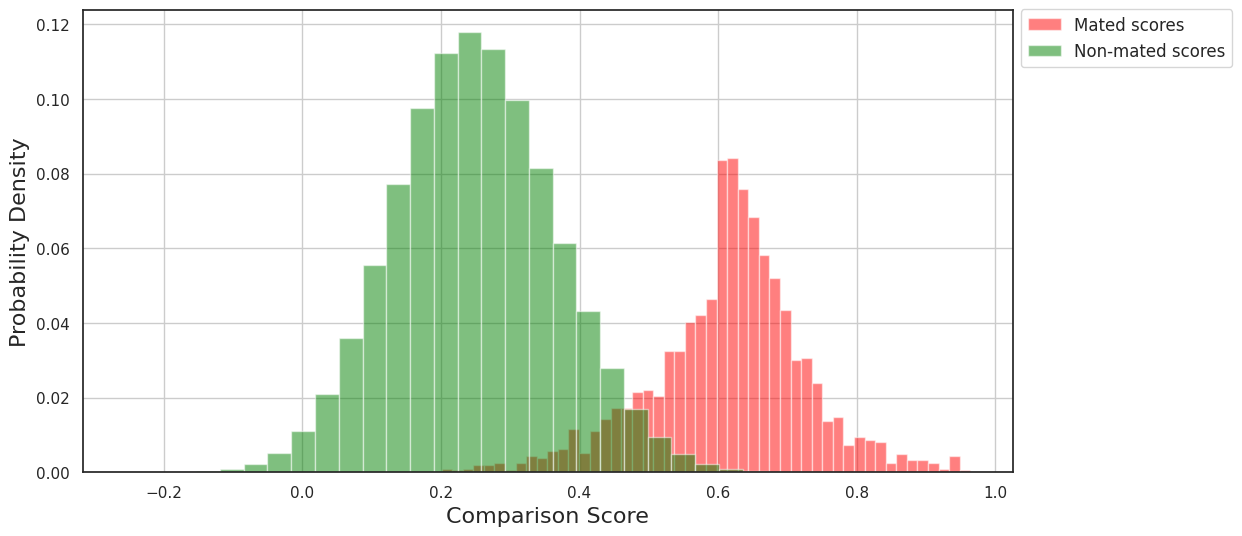

In [22]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True)


#### Canonical/Non-canonical

In [ ]:
df_canonical = pd.read_csv("../../data/OFIQ_results/canonical_children_final.csv", sep=";")

In [ ]:
image_names_can, ids_can, num_ids_can, norm_feats_can = load_magface_vectors(feature_list_children, canonical=True, df_c_can=df_canonical)
# Similarity matrices from magface - canonical
sim_mat_canonical = np.dot(norm_feats_can, norm_feats_can.T)

In [ ]:
random_states = [3]#[1,2,3,4,5,6,7,8,9,10]
sim_mat_dict_all_magface_ex1_2 = {}
FNIR_c_list=[]
FNIR_can_list=[]
FPIR_c_list=[]
FPIR_can_list=[]


for random_state_i in random_states:

    ### Load children and canonical balanced data ###
    children_balanced_df_i = balance_child_data(children_all, print_stats=False, random_state=random_state_i)
    canonical_names = list(df_canonical.Filename.apply(lambda x: x[:-4]))
    canonical_children_balanced_df_i = children_balanced_df_i[children_balanced_df_i.image_name.isin(canonical_names)]

    ### All reference image names, enrolled and non-enrolled image names - children ###
    c_mates = children_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
    enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
    enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(enrolled_identity_names_c)].image_name)
    non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
    non_enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
    all_reference_image_names_c = list(children_balanced_df_i.image_name)


    ### All reference image names, enrolled and non-enrolled image names - canonical ###
    can_mates = canonical_children_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
    enrolled_identity_names_can = can_mates[can_mates[('identity_name', 'count')] > 1].index
    enrolled_image_names_can = list(canonical_children_balanced_df_i[canonical_children_balanced_df_i["identity_name"].isin(enrolled_identity_names_can)].image_name)
    non_enrolled_identity_names_can = can_mates[can_mates[('identity_name', 'count')] == 1].index
    non_enrolled_image_names_can = list(canonical_children_balanced_df_i[canonical_children_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_can)].image_name)
    all_reference_image_names_can = list(canonical_children_balanced_df_i.image_name)


    ### Similarity matrices for ids in reference database ###
    indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c]
    indices_can_all_reference = [image_names_can.index(name) for name in all_reference_image_names_can]

    # Extract corresponding columns from the similarity matrix
    sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]
    sim_mat_can_reference_cols = sim_mat_canonical[:, indices_can_all_reference]

    # Extract corresponding rows from the numerical ids
    num_ids_c_reference = num_ids_c[indices_c_all_reference]
    num_ids_can_reference = num_ids_can[indices_can_all_reference]


    ### Similarity matrices for non-enrolled ids ###
    # Get indices of all feature and numerical id elements that are non-enrolled  ids
    indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
    indices_can_non_enrolled = [image_names_can.index(name) for name in non_enrolled_image_names_can]

    # Extract corresponding rows from the similarity matrix
    sim_mat_c_non_enrolled = sim_mat_c_reference_cols[indices_c_non_enrolled]
    sim_mat_can_non_enrolled = sim_mat_can_reference_cols[indices_can_non_enrolled]

    # Extract corresponding rows from the numerical ids
    num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
    num_ids_can_non_enrolled = num_ids_can[indices_can_non_enrolled]

    ### Similarity matrices for enrolled ids ###
    # Get indices of all feature and numerical id elements that are enrolled ids
    indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
    indices_can_enrolled = [image_names_can.index(name) for name in enrolled_image_names_can]

    # Extract corresponding rows from the similarity matrix
    sim_mat_c_enrolled = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)] # only enrolled columns and rows
    sim_mat_can_enrolled = sim_mat_a[np.ix_(indices_can_enrolled, indices_can_enrolled)]

    # Extract corresponding rows from the numerical ids
    num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
    num_ids_can_enrolled = num_ids_can[indices_can_enrolled]


    ### DET THINGS ###
    thold = 0.43

    ### Evaluation metrics ###
    # FNIR
    FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=thold)
    FNIR_can, sim_mat_can_enrolled = compute_fnir(sim_mat_can_enrolled, sim_mat_canonical, enrolled_identity_names_can, num_ids_can_enrolled, ids_can, thold=thold)
    # FPIR
    FPIR_c = compute_fpir(sim_mat_c_non_enrolled, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
    FPIR_can = compute_fpir(sim_mat_can_non_enrolled, num_ids_can_non_enrolled, num_ids_can_reference, thold=thold)


    FNIR_c_list.append(FNIR_c)
    FNIR_can_list.append(FNIR_can)
    FPIR_c_list.append(FPIR_c)
    FPIR_can_list.append(FPIR_can)

    sim_mat_dict_all_magface_ex1_2['sim_mat_c_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_c_enrolled
    sim_mat_dict_all_magface_ex1_2['sim_mat_can_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_can_enrolled
    sim_mat_dict_all_magface_ex1_2['sim_mat_c_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_c_non_enrolled)
    sim_mat_dict_all_magface_ex1_2['sim_mat_can_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_can_non_enrolled)


    print("done")

# Create a DataFrame from the lists
data_can = {'Iteration': random_states,'FNIR_c': FNIR_c_list, 'FNIR_can': FNIR_can_list, "FPIR_c": FPIR_c_list, "FPIR_can": FPIR_can_list, "Threshold": thold}
df_can_results = pd.DataFrame(data_can)


In [ ]:
df_can_results